In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
file = Path("sources/Amazon Customer Behavior Survey.csv")

file_df = pd.read_csv(file)

file_df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [3]:
age_gender = file_df.loc[:, ['age', 'Gender', 'Purchase_Frequency', 'Browsing_Frequency']]

age_gender.head(10)

,age,Gender,Purchase_Frequency,Browsing_Frequency
0,23,Female,Few times a month,Few times a week
1,23,Female,Once a month,Few times a month
2,24,Prefer not to say,Few times a month,Few times a month
3,24,Female,Once a month,Few times a month
4,22,Female,Less than once a month,Few times a month
5,21,Female,Less than once a month,Rarely
6,22,Female,Less than once a month,Rarely
7,21,Female,Few times a month,Rarely
8,20,Female,Less than once a month,Few times a month
9,23,Female,Less than once a month,Rarely


In [4]:
unique_purchase_frequency = file_df['Purchase_Frequency'].unique()
print("Unique values in Purchase_Frequency column:")
print(unique_purchase_frequency)

Unique values in Purchase_Frequency column:
['Few times a month' 'Once a month' 'Less than once a month'
 'Multiple times a week' 'Once a week']


In [5]:
unique_browsing_Frequency = file_df['Browsing_Frequency'].unique()
print("Unique values in Browsing_Frequency column:")
print(unique_browsing_Frequency)

Unique values in Browsing_Frequency column:
['Few times a week' 'Few times a month' 'Rarely' 'Multiple times a day']


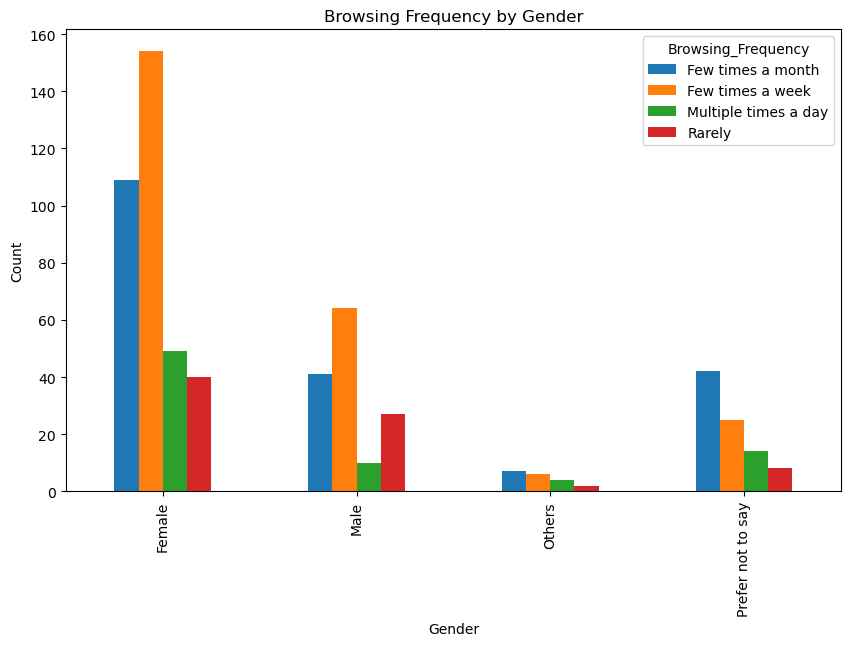

In [6]:
grouped = file_df.groupby(['Gender', 'Browsing_Frequency']).size().unstack()
grouped.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Browsing Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [7]:
missing_values = file_df.isnull().sum()
print(missing_values)

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [8]:
age_stats = file_df['age'].describe()
print(age_stats)

count    602.000000
mean      30.790698
std       10.193276
min        3.000000
25%       23.000000
50%       26.000000
75%       36.000000
max       67.000000
Name: age, dtype: float64


### The average age is approximately 30.79. The age data has a standard deviation of around 10.19 indicates moderate variability (spread) from the mean.

### The youngest age in the dataset is 3 years. It's unusual for a 3-year-old to make purchases directly on Amazon. It might be a data entry error, a misunderstanding, or a representation of family accounts used by individuals of different ages.It might be necessary to investigate further to understand how and why an entry with a 3-year-old's age is present in the dataset.

### 25% of the data has ages less than or equal to 23 years.

### 50% of the data has ages less than or equal to 26 years.

###  75% of the data has ages less than or equal to 36 years.

###  The oldest age in the dataset is 67 years.


In [9]:
bins = [0, 10, 20, 30, 40, 50, 70]  # Customize these bins according to your age ranges
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-70']  # Labels for the age groups

# Create a new column 'Age_Group' with the age groups
file_df['Age_Group'] = pd.cut(file_df['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage distribution of age groups
age_group_percentage = file_df['Age_Group'].value_counts(normalize=True) * 100
print("Percentage Distribution of Age Groups:")
print(age_group_percentage)

Percentage Distribution of Age Groups:
21-30    51.993355
31-40    23.920266
41-50    14.451827
51-70     5.647841
11-20     3.820598
0-10      0.166113
Name: Age_Group, dtype: float64


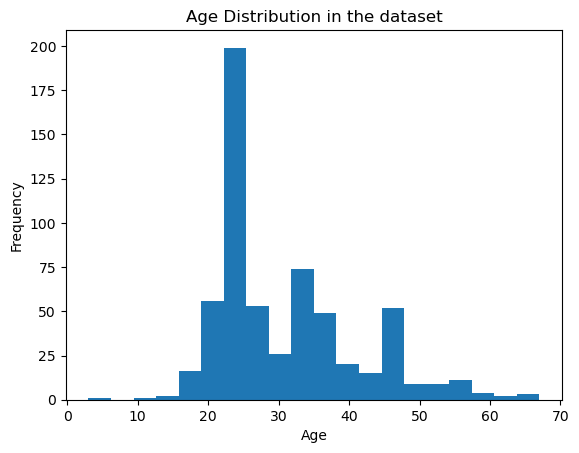

In [10]:
plt.hist(file_df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in the dataset')
plt.show()

### The age distribution chart shows that the  majority of Amazon customers are in the 21-30 age group, The next largest age group is 31-40 & Customers in the 51-80 and 11-20 age groups make up a smaller portion of the customer base.

### This data suggests that Amazon is popular with young adults. This may be due to a number of factors, such as the convenience of online shopping and  accessibility of technology.

### Amazon should focus its marketing efforts on young adults, as they represent the majority of its customer base and may want to develop more products and services that are specifically targeted to young adults.


In [11]:
gender_counts = file_df['Gender'].value_counts()
print(gender_counts)

Female               352
Male                 142
Prefer not to say     89
Others                19
Name: Gender, dtype: int64


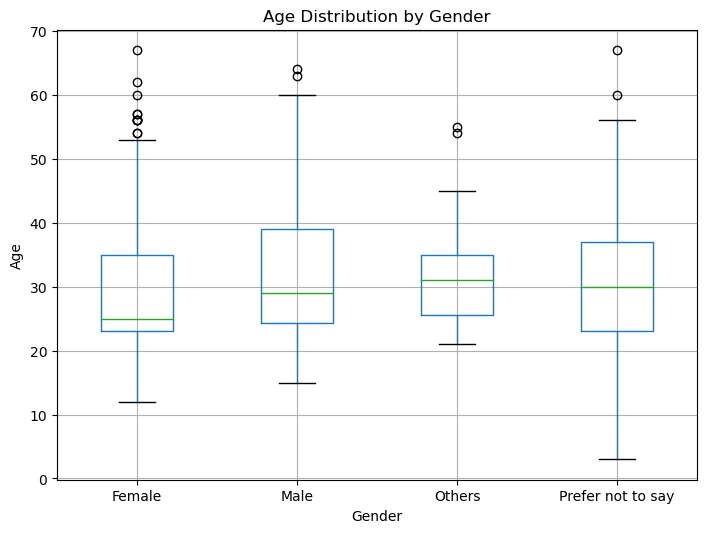

In [12]:
# Separate boxplot for age based on gender
file_df.boxplot(column='age', by='Gender', figsize=(8, 6))
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.suptitle('')  # Removes default title
plt.show()

###  The median age is lower in females than in males and the interquartile range (IQR) is wider in males than in females, suggesting that there is more variability in age among male customers. 


In [13]:
## analyzing age range and purchasing frequency 

<Figure size 1000x600 with 0 Axes>

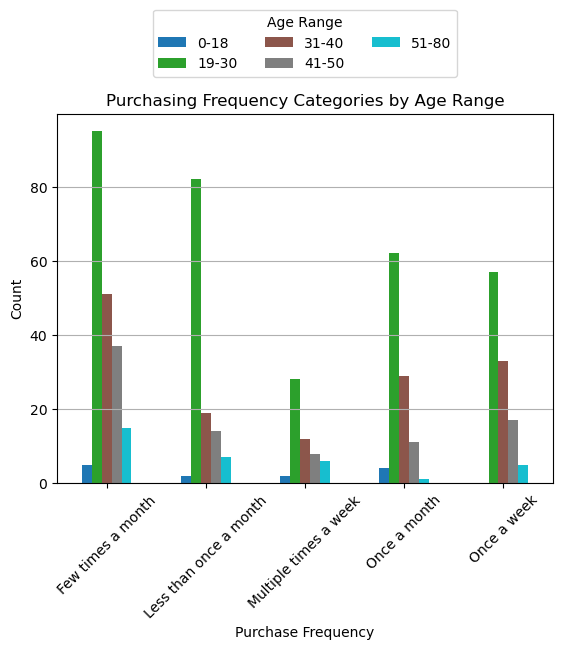

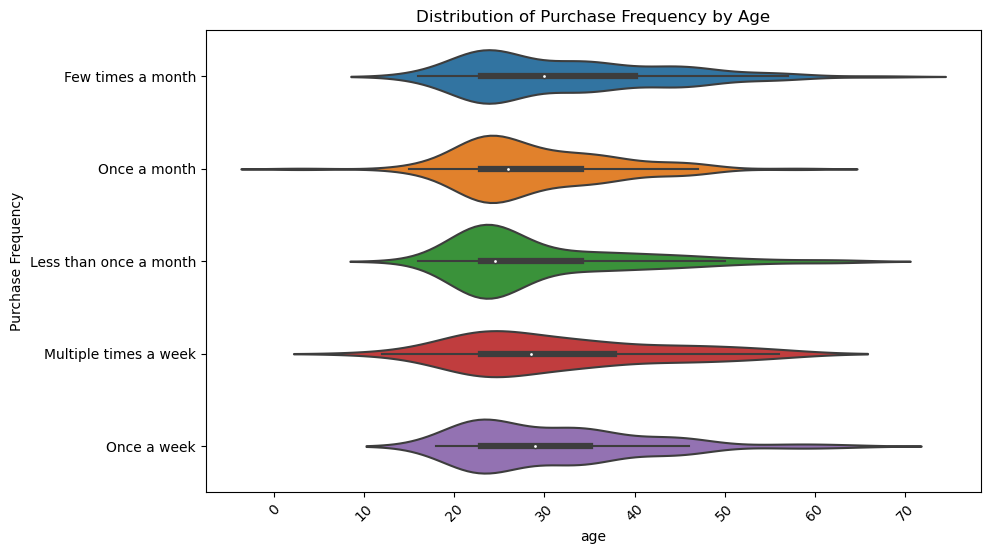

In [14]:
purchasing_categories = [
    'Few times a month',
    'Once a month',
    'Less than once a month',
    'Multiple times a week',
    'Once a week'
]

# Create age ranges
bins = [0, 18, 30, 40, 50, 80]
labels = ['0-18', '19-30', '31-40', '41-50', '51-80']
file_df['AgeRange'] = pd.cut(file_df['age'], bins=bins, labels=labels, right=False)

# Filter the data for the purchasing categories
file_df_filtered = file_df[file_df['Purchase_Frequency'].isin(purchasing_categories)]

# Count the occurrences of each category by age range
purchase_by_age_range = file_df_filtered.groupby(['Purchase_Frequency', 'AgeRange']).size().unstack()

# Plot the purchasing frequency categories by age range
plt.figure(figsize=(10, 6))
purchase_by_age_range.plot(kind='bar', stacked=False, colormap='tab10')
plt.title('Purchasing Frequency Categories by Age Range')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Range', loc='upper center', bbox_to_anchor=(0.5, 1.30), ncol=3)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))

# Create a violin plot to show the distribution of Purchase Frequency by Age
sns.violinplot(x='age', y='Purchase_Frequency', data=file_df)
plt.xlabel('age')
plt.ylabel('Purchase Frequency')
plt.title('Distribution of Purchase Frequency by Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### The chart shows that the most common purchasing frequency for all age ranges is "Few times a month." However, there are some differences in purchasing frequency across age ranges.

### Younger customers (ages 19-30) are split in habbits since the 2 most common purchasing frequency for this age range is either  "few times a month" or "less than once a month", this suggests a divergence in purchasing behavior.
### These differences might be due to varying income levels, personal priorities

### Older customers (ages 51-80) are more likely to purchase items "Few times a month", and a large number of people in that age group actually puchases few times a month since we discovered that the only make around 15% of the data and their chart is high. and thats most likely due to their finantial stability.

In [15]:
## Analizing the gender and purchasing frequency

<Figure size 1000x600 with 0 Axes>

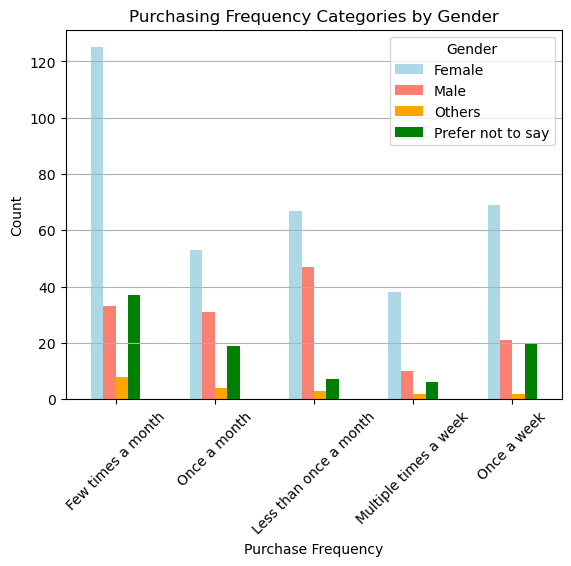

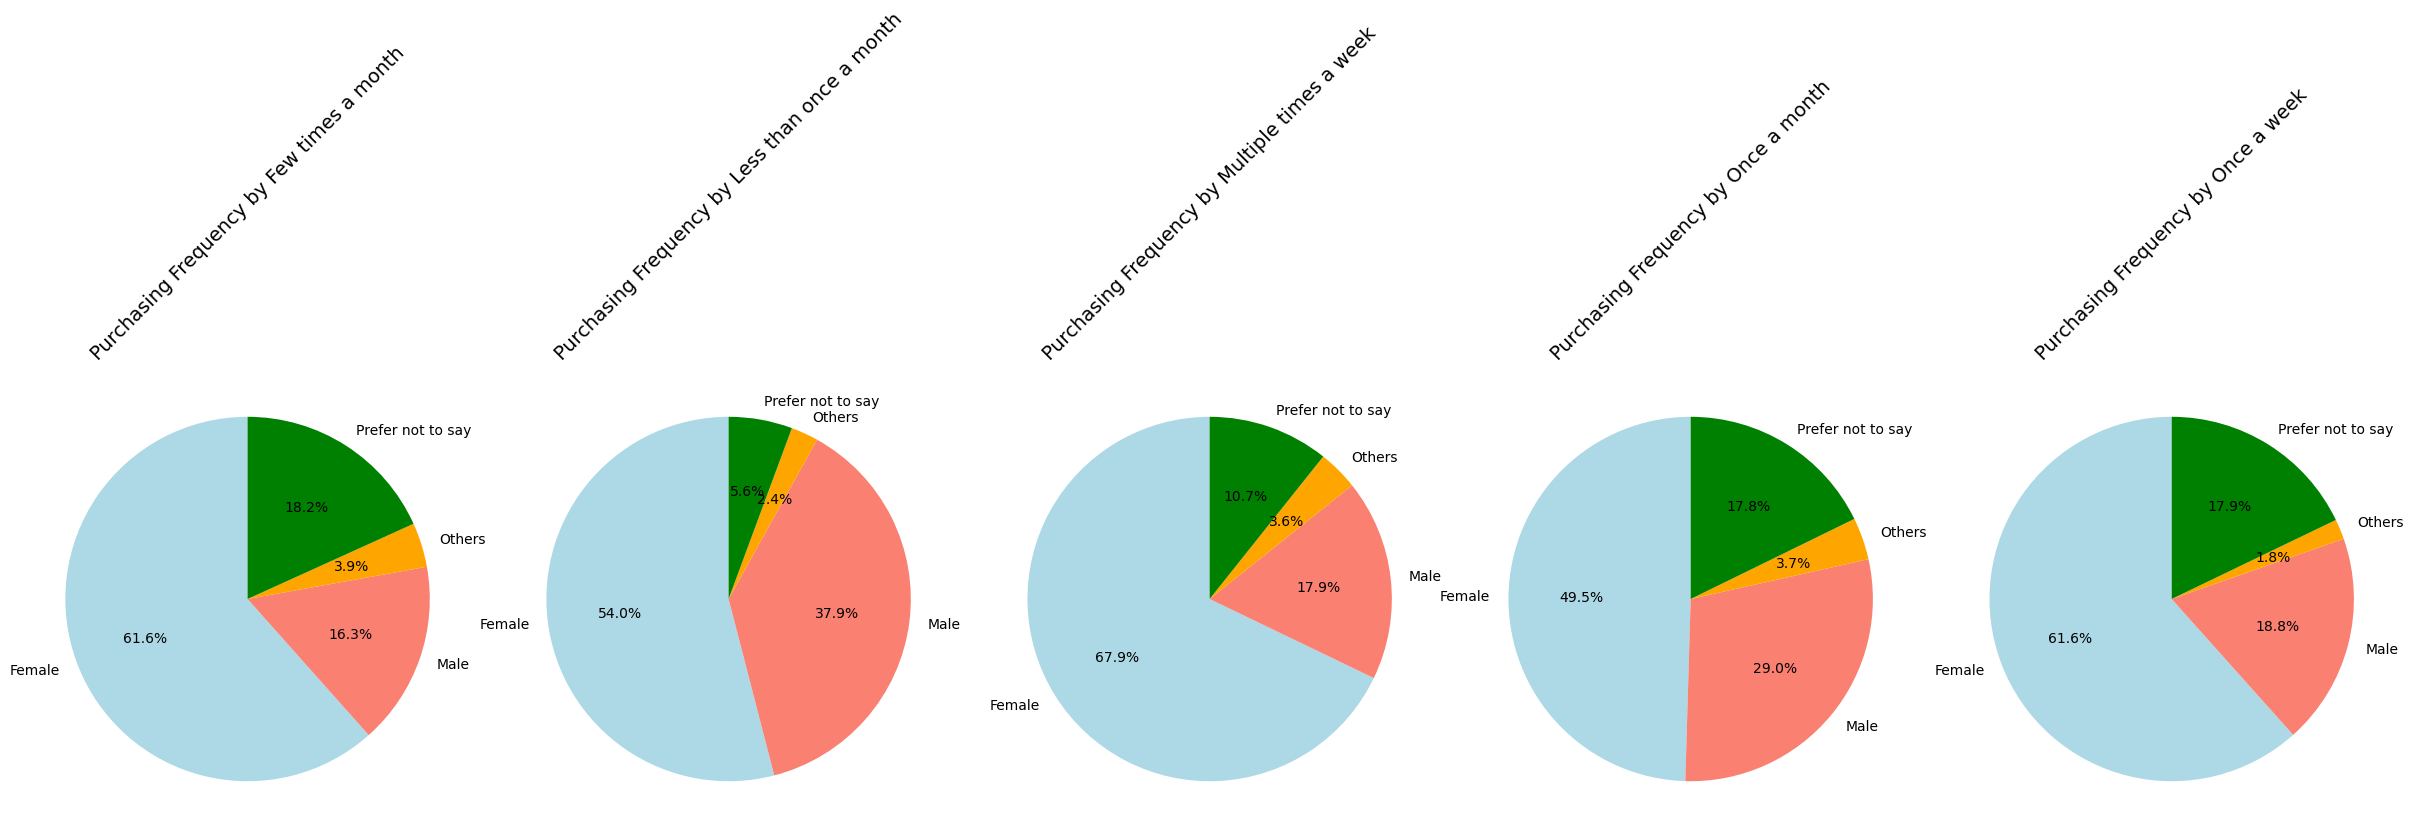

In [16]:
# Define the purchasing frequency categories
purchasing_categories = [
    'Few times a month',
    'Once a month',
    'Less than once a month',
    'Multiple times a week',
    'Once a week'
]

# Filter the data for the purchasing categories
data_filtered = file_df[file_df['Purchase_Frequency'].isin(purchasing_categories)]

# Count the occurrences of each category by gender
purchase_by_gender = data_filtered.groupby(['Purchase_Frequency', 'Gender']).size().unstack().reindex(purchasing_categories)

# Plot the purchasing frequency categories by gender
plt.figure(figsize=(10, 6))
purchase_by_gender.plot(kind='bar', stacked=False, color=['lightblue', 'salmon', 'orange', 'green'])
plt.title('Purchasing Frequency Categories by Gender')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y')
plt.show()

purchase_by_gender = data_filtered.groupby(['Purchase_Frequency', 'Gender']).size().unstack()

# Define colors for the pie chart (based on genders)
colors = ['lightblue', 'salmon', 'orange', 'green']

# Plot the purchasing frequency categories by gender in a pie chart
fig, axs = plt.subplots(1, len(purchase_by_gender), figsize=(30, 6))

for i, (gender, row) in enumerate(purchase_by_gender.iterrows()):
    axs[i].pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'Purchasing Frequency by {gender}', fontsize=14, rotation = 45)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

###  Overall, the bar chart shows that females are more likely to purchase items more than male, and fomales purchase the most out of all genders multiple times a week. This may be due to a number of factors, such as interest in shopping, disposable income, and shopping habits.

In [17]:
### catigories need to be fixed split by ; to 4 columns since some people purchased 4 cat.
categories_split = file_df['Purchase_Categories'].str.split(';', expand=True)

In [18]:
categories_split.head()

,0,1,2,3,4
0,Beauty and Personal Care,None,None,None,None
1,Clothing and Fashion,None,None,None,None
2,Groceries and Gourmet Food,Clothing and Fashion,None,None,None
3,Beauty and Personal Care,Clothing and Fashion,others,None,None
4,Beauty and Personal Care,Clothing and Fashion,None,None,None


<Figure size 1000x600 with 0 Axes>

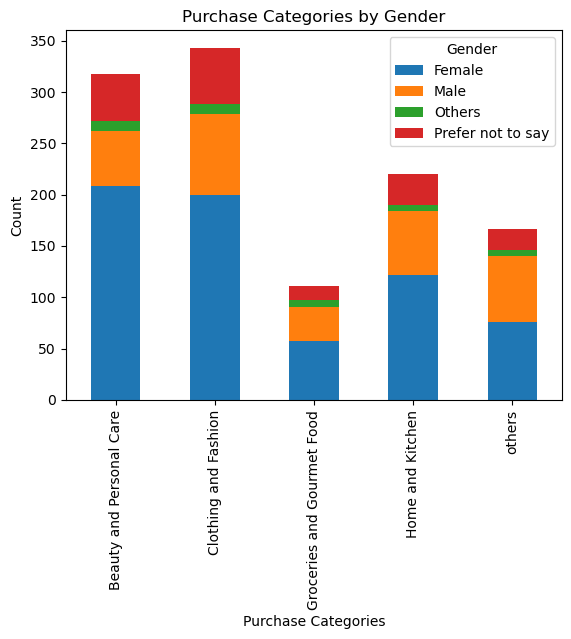

In [19]:
stacked_categories = pd.concat([categories_split, file_df['Gender']], axis=1)
stacked_categories = stacked_categories.melt(id_vars='Gender').dropna()

# Create a bar plot showing the count of each category by gender
plt.figure(figsize=(10, 6))
category_plot = stacked_categories.groupby(['value', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Purchase Categories by Gender')
plt.xlabel('Purchase Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

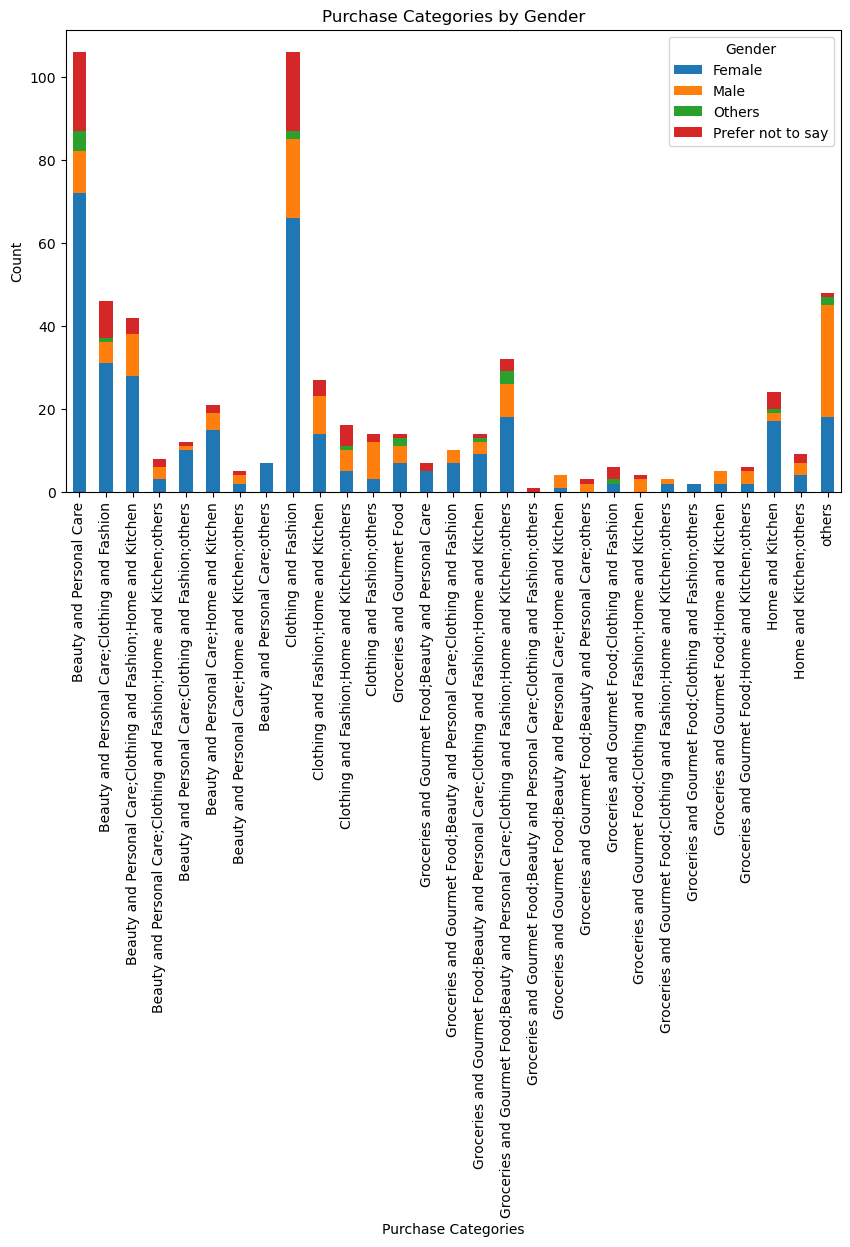

In [20]:
### the previos problem i encountered !! 
purchase_by_gender = file_df.groupby(['Purchase_Categories', 'Gender']).size().unstack()
purchase_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purchase Categories by Gender')
plt.xlabel('Purchase Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

In [21]:
### notes:

# add notes analyzing the visualizations.
# wich catigory is sold the most (either push whats not selling as much or whats selling great)
# write a summary and answer each question.
# statistical analysis
# we all have to speak and explain out parts.
# work on another box plot to make analysis.
# talk abnout age statistic and put ther age disrt. chart next to it.
# the categories talk about them.

In [22]:
contingency_table = pd.crosstab(file_df['Gender'], file_df['Browsing_Frequency'])
###### we have to tell it the categories of ....
# Performing the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the test statistics and p-value
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 23.442982496413883
P-value: 0.005274489193265827


In [23]:
contingency_table = pd.crosstab(file_df['age'], file_df['Purchase_Frequency'])
###### we have to tell it the categories of ....
# Performing the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the test statistics and p-value
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 264.454150015774
P-value: 0.0008053407977884633


In [24]:
## analyze age and gender for reveis importance

In [29]:
observed = pd.crosstab(file_df['Gender'], file_df['Purchase_Frequency'])

chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis: Gender and Purchasing Frequency are related.")
else:
    print("Fail to reject the null hypothesis: No significant relationship observed.")

Chi-square value: 33.88800038715973
P-value: 0.0007025216973103722
Reject the null hypothesis: Gender and Purchasing Frequency are related.


In [31]:
observed = pd.crosstab(file_df['Gender'], file_df['Customer_Reviews_Importance'])

chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
alpha = 0.05

if p < alpha:
    print("Reject the null hypothesis: Gender and Customer_Reviews_Importance are related.")
else:
    print("Fail to reject the null hypothesis: No significant relationship observed.")

Chi-square value: 36.42311254741295
P-value: 0.00027694958622890095
Reject the null hypothesis: Gender and Customer_Reviews_Importance are related.
